In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
df=pd.read_csv(r'DataAnalyst.csv',encoding='gb2312')

In [4]:
df.head()

,city,companyFullName,companyId,companyLabelList,companyShortName,companySize,businessZones,firstType,secondType,education,industryField,positionId,positionAdvantage,positionName,positionLables,salary,workYear
0,上海,纽海信息技术(上海)有限公司,8581,"['技能培训', '节日礼物', '带薪年假', '岗位晋升']",1号店,2000人以上,['张江'],技术,数据开发,硕士,移动互联网,2537336,知名平台,数据分析师,"['分析师', '数据分析', '数据挖掘', '数据']",7k-9k,应届毕业生
1,上海,上海点荣金融信息服务有限责任公司,23177,"['节日礼物', '带薪年假', '岗位晋升', '扁平管理']",点融网,500-2000人,"['五里桥', '打浦桥', '制造局路']",技术,数据开发,本科,金融,2427485,"挑战机会,团队好,与大牛合作,工作环境好",数据分析师-CR2017-SH2909,"['分析师', '数据分析', '数据挖掘', '数据']",10k-15k,应届毕业生
2,上海,上海晶樵网络信息技术有限公司,57561,"['技能培训', '绩效奖金', '岗位晋升', '管理规范']",SPD,50-150人,['打浦桥'],设计,数据分析,本科,移动互联网,2511252,"时间自由,领导nic",数据分析师,"['分析师', '数据分析', '数据']",4k-6k,应届毕业生
3,上海,杭州数云信息技术有限公司上海分公司,7502,"['绩效奖金', '股票期权', '五险一金', '通讯津贴']",数云,150-500人,"['龙华', '上海体育场', '万体馆']",市场与销售,数据分析,本科,"企业服务,数据服务",2427530,五险一金 绩效奖金 带薪年假 节日福利,大数据业务分析师【数云校招】,"['商业', '分析师', '大数据', '数据']",6k-8k,应届毕业生
4,上海,上海银基富力信息技术有限公司,130876,"['年底双薪', '通讯津贴', '定期体检', '绩效奖金']",银基富力,15-50人,"['上海影城', '新华路', '虹桥']",技术,软件开发,本科,其他,2245819,在大牛下指导,BI开发/数据分析师,"['分析师', '数据分析', '数据', 'BI']",2k-3k,应届毕业生


In [5]:
print(df.info())  #columns数据不一致,有缺失空白  部分字段为数字,其他为字符串

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6876 entries, 0 to 6875
Data columns (total 17 columns):
city                 6876 non-null object
companyFullName      6876 non-null object
companyId            6876 non-null int64
companyLabelList     6170 non-null object
companyShortName     6876 non-null object
companySize          6876 non-null object
businessZones        4873 non-null object
firstType            6869 non-null object
secondType           6870 non-null object
education            6876 non-null object
industryField        6876 non-null object
positionId           6876 non-null int64
positionAdvantage    6876 non-null object
positionName         6876 non-null object
positionLables       6844 non-null object
salary               6876 non-null object
workYear             6876 non-null object
dtypes: int64(2), object(15)
memory usage: 913.3+ KB
None


In [10]:
print(len(df.positionId.unique()))#以positionId 为准,查看不重复的职位id
df_duplicates=df.drop_duplicates(subset='positionId',keep='first').copy()  
# 去重
# DataFrame.drop_duplicates(subset=None, keep='first', inplace=False)
# subset： 以哪个列为去重基准。
# keep： {‘first’, ‘last’, False}, 默认值 ‘first’。
# first： 保留第一次出现的重复项。
# last： 保留最后一次出现。
# False： 删除所有重复项。
# inplace：布尔值，默认为False，是否覆盖原数据。

print(df_duplicates.head())

5031
  city    companyFullName  companyId                  companyLabelList  \
0   上海     纽海信息技术(上海)有限公司       8581  ['技能培训', '节日礼物', '带薪年假', '岗位晋升']   
1   上海   上海点荣金融信息服务有限责任公司      23177  ['节日礼物', '带薪年假', '岗位晋升', '扁平管理']   
2   上海     上海晶樵网络信息技术有限公司      57561  ['技能培训', '绩效奖金', '岗位晋升', '管理规范']   
3   上海  杭州数云信息技术有限公司上海分公司       7502  ['绩效奖金', '股票期权', '五险一金', '通讯津贴']   
4   上海     上海银基富力信息技术有限公司     130876  ['年底双薪', '通讯津贴', '定期体检', '绩效奖金']   

  companyShortName companySize           businessZones firstType secondType  \
0              1号店     2000人以上                  ['张江']        技术       数据开发   
1              点融网   500-2000人  ['五里桥', '打浦桥', '制造局路']        技术       数据开发   
2              SPD     50-150人                 ['打浦桥']        设计       数据分析   
3               数云    150-500人  ['龙华', '上海体育场', '万体馆']     市场与销售       数据分析   
4             银基富力      15-50人   ['上海影城', '新华路', '虹桥']        技术       软件开发   

  education industryField  positionId     positionAdvantage  \
0        硕士 

In [12]:
df.drop_duplicates(subset='positionId',keep='first').copy()?

SyntaxError: invalid syntax (<ipython-input-12-e4cd1e549118>, line 1)

In [13]:
help(df.drop_duplicates(subset='positionId',keep='first').copy)  
# 获取使用帮助
# 获取数据及索引的拷贝
# 任何对此拷贝索引及数据的修改都不会影响到原数据

Help on method copy in module pandas.core.generic:

copy(deep=True) method of pandas.core.frame.DataFrame instance
    Make a copy of this object's indices and data.
    
    When ``deep=True`` (default), a new object will be created with a
    copy of the calling object's data and indices. Modifications to
    the data or indices of the copy will not be reflected in the
    original object (see notes below).
    
    When ``deep=False``, a new object will be created without copying
    the calling object's data or index (only references to the data
    and index are copied). Any changes to the data of the original
    will be reflected in the shallow copy (and vice versa).
    
    Parameters
    ----------
    deep : bool, default True
        Make a deep copy, including a copy of the data and the indices.
        With ``deep=False`` neither the indices nor the data are copied.
    
    Returns
    -------
    copy : Series, DataFrame or Panel
        Object type matches caller.
    

In [14]:
#处理薪资数据 
def cut_word(word,method):
    position=word.find('-')
    length=len(word)
    if position !=-1:
        #如果薪资数据内存在-为真,执行本语句,获取-和k之前的数据和-及k之间的数据
        bottomSalary=word[:position-1]
        topSalary=word[position+1:length-1]
    else:
        #如果没有-, 将该数据全部转化为大写后截取数据
        bottomSalary=word[:word.upper().find('K')]
        topSalary=bottomSalary
    if method =='bottom':
        return bottomSalary
    else:
        return topSalary
# 添加新列,获取薪资的最低和最高
df_duplicates['topSalary']=df_duplicates.salary.apply(cut_word,method='top')
df_duplicates['bottomSalary']=df_duplicates.salary.apply(cut_word,method='bottom')
#调用函数,在Series值上调用函数 method='bottom' 为传递的参数,返回对每个数据的操作后的值

In [16]:
df_duplicates.salary.apply?

Signature: df_duplicates.salary.apply(func, convert_dtype=True, args=(), **kwds)
Docstring:
Invoke function on values of Series.

Can be ufunc (a NumPy function that applies to the entire Series)
or a Python function that only works on single values.

Parameters
----------
func : function
    Python function or NumPy ufunc to apply.
convert_dtype : bool, default True
    Try to find better dtype for elementwise function results. If
    False, leave as dtype=object.
args : tuple
    Positional arguments passed to func after the series value.
**kwds
    Additional keyword arguments passed to func.

Returns
-------
Series or DataFrame
    If func returns a Series object the result will be a DataFrame.

See Also
--------
Series.map: For element-wise operations.
Series.agg: Only perform aggregating type operations.
Series.transform: Only perform transforming type operations.

Examples
--------
Create a series with typical summer temperatures for each city.

>>> s = pd.Series([20, 21, 12],
.

In [17]:
df_duplicates.bottomSalary.head()

0     7
1    10
2     4
3     6
4     2
Name: bottomSalary, dtype: object

In [18]:
df_duplicates.bottomSalary=df_duplicates.bottomSalary.astype('int')
df_duplicates.topSalary=df_duplicates.topSalary.astype('int')

In [19]:
df_duplicates.bottomSalary.head()

0     7
1    10
2     4
3     6
4     2
Name: bottomSalary, dtype: int64

In [20]:
#求平均薪资。
#lambda 详见：https://blog.csdn.net/BIT_SKY/article/details/50781806
df_duplicates['avgSalary']=df_duplicates.apply(lambda x:(x.bottomSalary+x.topSalary)/2,axis=1) 
#axis是apply中的参数，axis=0表示将函数用在行，axis=1则是列。

In [21]:
df_duplicates['avgSalary'].head()

0     8.0
1    12.5
2     5.0
3     7.0
4     2.5
Name: avgSalary, dtype: float64

In [25]:
df_clean=df_duplicates[['city','companyShortName','companySize','education','positionLables','workYear','avgSalary','positionName']].copy()
df_clean.head()

,city,companyShortName,companySize,education,positionLables,workYear,avgSalary,positionName
0,上海,1号店,2000人以上,硕士,"['分析师', '数据分析', '数据挖掘', '数据']",应届毕业生,8.0,数据分析师
1,上海,点融网,500-2000人,本科,"['分析师', '数据分析', '数据挖掘', '数据']",应届毕业生,12.5,数据分析师-CR2017-SH2909
2,上海,SPD,50-150人,本科,"['分析师', '数据分析', '数据']",应届毕业生,5.0,数据分析师
3,上海,数云,150-500人,本科,"['商业', '分析师', '大数据', '数据']",应届毕业生,7.0,大数据业务分析师【数云校招】
4,上海,银基富力,15-50人,本科,"['分析师', '数据分析', '数据', 'BI']",应届毕业生,2.5,BI开发/数据分析师


In [28]:
df_clean.city.value_counts?
#返回包含唯一值计数的系列 根据一个列名计算,返回唯一值的计数

Signature:
df_clean.city.value_counts(
    normalize=False,
    sort=True,
    ascending=False,
    bins=None,
    dropna=True,
)
Docstring:
Return a Series containing counts of unique values.

The resulting object will be in descending order so that the
first element is the most frequently-occurring element.
Excludes NA values by default.

Parameters
----------
normalize : boolean, default False
    If True then the object returned will contain the relative
    frequencies of the unique values.
sort : boolean, default True
    Sort by values.
ascending : boolean, default False
    Sort in ascending order.
bins : integer, optional
    Rather than count values, group them into half-open bins,
    a convenience for ``pd.cut``, only works with numeric data.
dropna : boolean, default True
    Don't include counts of NaN.

Returns
-------
counts : Series

See Also
--------
Series.count: Number of non-NA elements in a Series.
DataFrame.count: Number of non-NA elements in a DataFrame.

Exampl

In [29]:
print(df_clean.describe())

         avgSalary
count  5031.000000
mean     17.111409
std       8.996242
min       1.500000
25%      11.500000
50%      15.000000
75%      22.500000
max      75.000000


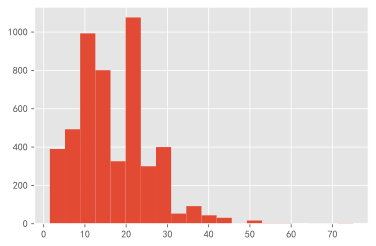

In [30]:
# 用来正常显示中文标签。
plt.rcParams['font.sans-serif']=['SimHei']
df_clean.avgSalary.hist(bins=20)
plt.show()

In [40]:
#groupby()分组，median()中位数，sort_values（ascending=False）排序（降序）。
df_clean.groupby(df_clean.city).avgSalary.median().sort_values(ascending=False)
#根据某一列值对数据分组,分组的同时对指定的列(可计算的数)获取分组内指定列最大或最小的数,获取中位数,并排序(类似数据sql的group 操作)
help(df_clean.groupby(df_clean.city))

,city,companyShortName,companySize,education,positionLables,workYear,avgSalary,positionName
0,上海,1号店,2000人以上,硕士,"['分析师', '数据分析', '数据挖掘', '数据']",应届毕业生,8.0,数据分析师
1,上海,点融网,500-2000人,本科,"['分析师', '数据分析', '数据挖掘', '数据']",应届毕业生,12.5,数据分析师-CR2017-SH2909
2,上海,SPD,50-150人,本科,"['分析师', '数据分析', '数据']",应届毕业生,5.0,数据分析师
3,上海,数云,150-500人,本科,"['商业', '分析师', '大数据', '数据']",应届毕业生,7.0,大数据业务分析师【数云校招】
4,上海,银基富力,15-50人,本科,"['分析师', '数据分析', '数据', 'BI']",应届毕业生,2.5,BI开发/数据分析师


In [62]:
df_clean.groupby(df_clean.city).avgSalary.median()

city
上海    15.0
北京    20.0
南京    10.0
厦门    10.5
天津     7.0
广州    11.5
成都    12.0
杭州    15.0
武汉    12.0
深圳    16.0
苏州    12.5
西安    11.5
长沙    10.0
Name: avgSalary, dtype: float64

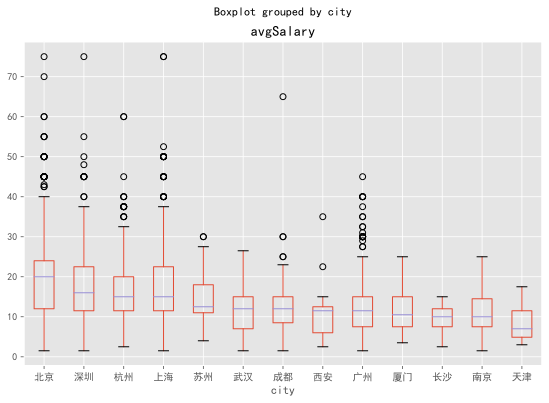

In [74]:
#转化成category格式，方便重新排序索引值，为了让箱体图中位数从高到低排列。
df_clean.city=df_clean.city.astype('category')
#转换类型,类似与枚举,一般为血型,性别
df_clean.city.cat.set_categories(['北京','深圳','杭州','上海','苏州','武汉','成都','西安','广州','厦门','长沙','南京','天津'],inplace=True)
df_clean.boxplot(column='avgSalary',by='city',figsize=(9,6))
plt.show()
#boxplot是调用箱线图函数，column选择箱线图的数值，by是选择分类变量，figsize是尺寸。


##熟悉箱线图

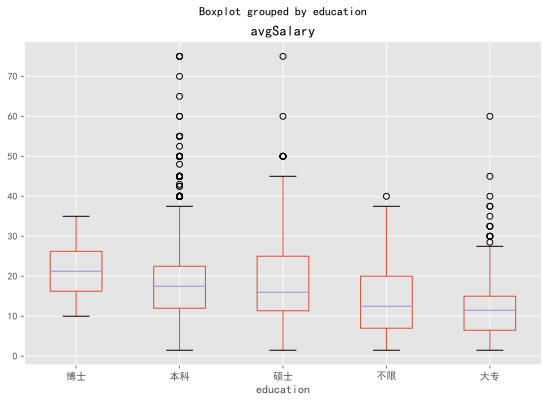

education
博士    21.666667
硕士    19.072917
本科    17.978227
不限    14.412892
大专    12.002439
Name: avgSalary, dtype: float64


In [75]:
#此处上侧方法一致，详见上方解释。
df_clean.groupby(df_clean.education).avgSalary.median().sort_values(ascending=False)

df_clean.education=df_clean.education.astype('category')
df_clean.education.cat.set_categories(['博士','本科','硕士','不限','大专'],inplace=True)
ax=df_clean.boxplot(column='avgSalary',by='education',figsize=(9,6))
plt.show()

print(df_clean.groupby(df_clean.education).avgSalary.mean().sort_values(ascending=False))

workYear
10年以上    37.166667
5-10年    26.835304
3-5年     20.030827
1-3年     13.802052
不限       11.305632
1年以下      8.221154
应届毕业生     7.162963
Name: avgSalary, dtype: float64


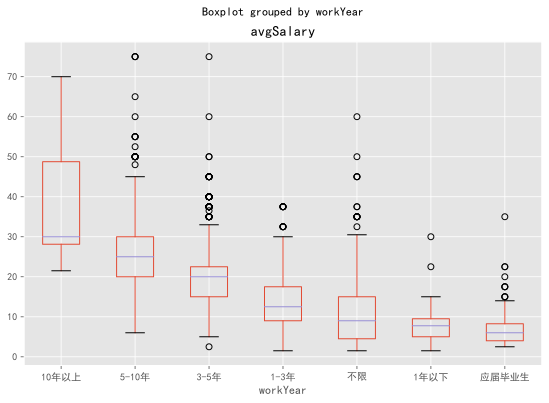

In [76]:
df_clean.groupby(df_clean.workYear).avgSalary.median().sort_values(ascending=False)

df_clean.workYear=df_clean.workYear.astype('category')
df_clean.workYear.cat.set_categories(['10年以上','5-10年','3-5年','1-3年','不限','1年以下','应届毕业生'],inplace=True)
df_clean.boxplot(column='avgSalary',by='workYear',figsize=(9,6))

print(df_clean.groupby(df_clean.workYear).avgSalary.mean().sort_values(ascending=False))

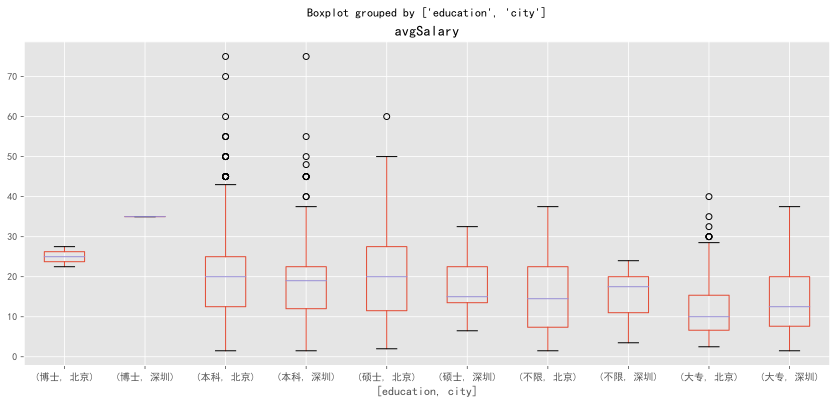

In [78]:
#现在想知道北京和深圳这两座城市，学历对薪资的影响。
df_sz_bj=df_clean[df_clean['city'].isin(['深圳','北京'])]
df_sz_bj.boxplot(column='avgSalary',by=['education','city'],figsize=[14,6])
plt.show()
#深圳博士生只有1人，稀缺物种！

In [79]:
#unstack()详见：https://www.cnblogs.com/bambipai/p/7658311.html
print(df_clean.groupby(['city','education']).avgSalary.mean().unstack())

education    博士         本科         硕士         不限         大专
city                                                       
北京         25.0  19.435802  19.759740  15.673387  12.339474
深圳         35.0  18.532911  18.029412  15.100000  13.898936
杭州          NaN  16.823432  20.710526  18.269231  12.327586
上海         15.0  17.987552  19.180000  14.051471  13.395455
苏州          NaN  14.310345  16.833333        NaN  14.600000
武汉          NaN  11.500000   7.000000  10.950000  11.214286
成都          NaN  13.520202  12.750000  10.562500  11.000000
西安          NaN  12.208333   5.000000   8.666667   8.150000
广州          NaN  14.170259  14.571429   9.250000   8.988095
厦门          NaN  11.805556  15.750000  12.500000   6.785714
长沙          NaN  10.633333   9.000000   7.642857   9.000000
南京          NaN  11.327869  13.500000   7.000000   9.272727
天津          NaN   9.300000        NaN   3.500000   5.500000


In [80]:
print(df_clean.groupby(['city','education']).avgSalary.count().unstack())

education   博士      本科     硕士     不限     大专
city                                       
北京         2.0  1877.0  154.0  124.0  190.0
深圳         1.0   395.0   17.0   20.0   94.0
杭州         NaN   303.0   19.0   26.0   58.0
上海         3.0   723.0   75.0   68.0  110.0
苏州         NaN    29.0    3.0    NaN    5.0
武汉         NaN    44.0    1.0   10.0   14.0
成都         NaN    99.0    2.0    8.0   26.0
西安         NaN    24.0    1.0    3.0   10.0
广州         NaN   232.0    7.0   12.0   84.0
厦门         NaN    18.0    2.0    3.0    7.0
长沙         NaN    15.0    1.0    7.0    2.0
南京         NaN    61.0    6.0    5.0   11.0
天津         NaN    15.0    NaN    1.0    4.0


In [81]:
#这里使用了agg函数，同时传入count和mean方法，然后返回了不同公司的计数和平均值两个结果。所以前文的mean，count，其实都省略了agg。agg除了系统自带的几个函数，它也支持自定义函数。
print(df_clean.groupby('companyShortName').avgSalary.agg(['count','mean']).sort_values(by='count',ascending=False))

                  count       mean
companyShortName                  
美团点评                175  21.862857
滴滴出行                 64  27.351562
百度                   44  19.136364
网易                   36  18.208333
今日头条                 32  17.125000
腾讯                   32  22.437500
京东                   32  20.390625
百度外卖                 31  17.774194
个推                   31  14.516129
TalkingData          28  16.160714
宜信                   27  22.851852
搜狐媒体                 23  25.739130
饿了么                  23  19.391304
Gridsum 国双           23  19.086957
去哪儿网                 22  17.863636
汽车之家                 21  18.952381
乐视                   19  21.052632
京东商城                 19  23.763158
滴滴出行（小桔科技）           18  34.722222
人人行(借贷宝)             17  21.088235
链家网                  16  17.250000
嘉琪科技                 16  24.625000
百融金服                 16  17.500000
易到用车                 16  16.156250
通联数据                 16   8.843750
星河互联集团               16  29.062500
陌陌                  

In [86]:
#自定义了函数topN，将传入的数据计数，并且从大到小返回前五的数据。然后以city聚合分组，因为求的是前5的公司，所以对companyShortName调用topN函数。

df_clean.groupby('companyShortName').avgSalary.agg(lambda x:max(x)-min(x))

def topN(df,n=5):
    counts=df.value_counts()
    return counts.sort_values(ascending=False)[:n]

print(df_clean.groupby('city').companyShortName.apply(topN))

city                 
北京    美团点评               156
      滴滴出行                60
      百度                  39
      今日头条                32
      百度外卖                31
深圳    腾讯                  25
      金蝶                  14
      华为技术有限公司            12
      香港康宏金融集团            12
      顺丰科技有限公司             9
杭州    个推                  22
      有数金服                15
      网易                  15
      同花顺                 14
      51信用卡管家             11
上海    饿了么                 23
      美团点评                19
      买单侠                 15
      返利网                 15
      点融网                 11
苏州    同程旅游                10
      朗动网络科技               3
      智慧芽                  3
      思必驰科技                2
      食行生鲜                 2
武汉    斗鱼直播                 5
      卷皮                   4
      武汉物易云通网络科技           4
      榆钱金融                 3
      远光软件武汉研发中心           2
                        ... 
西安    思特奇Si-tech           4
      天晓科技                 3
      绿盟科技           

In [83]:
print(df_clean.groupby('city').positionName.apply(topN))

city                               
北京    数据分析师                            238
      数据产品经理                           121
      大数据开发工程师                          69
      分析师                               49
      数据分析                              42
深圳    数据分析师                             52
      大数据开发工程师                          32
      数据产品经理                            24
      需求分析师                             21
      大数据架构师                            11
杭州    数据分析师                             44
      大数据开发工程师                          22
      数据产品经理                            15
      数据仓库工程师                           11
      数据分析                              10
上海    数据分析师                             79
      大数据开发工程师                          37
      数据产品经理                            31
      大数据工程师                            26
      需求分析师                             20
苏州    数据分析师                              8
      需求分析师                              2
      数据产品经理      

In [87]:
print(df_clean.positionLables)

0                           ['分析师', '数据分析', '数据挖掘', '数据']
1                           ['分析师', '数据分析', '数据挖掘', '数据']
2                                   ['分析师', '数据分析', '数据']
3                              ['商业', '分析师', '大数据', '数据']
4                             ['分析师', '数据分析', '数据', 'BI']
5                       ['实习', '投资', 'FA', '行业研究', '分析师']
6                                                  ['数据']
7                      ['需求分析', '顾问', '咨询', '咨询顾问', '数据']
8                                          ['后端开发', '数据']
9                                                  ['数据']
10                                    ['平台', '大数据', '数据']
11                                         ['数据分析', '数据']
12                                   ['数据分析', '数据', 'BI']
13                                                 ['数据']
14                                          ['大数据', '数据']
15                                                 ['数据']
16                                          ['大数据', '数据']
17            

In [88]:
print(df_clean.positionLables.str[1:-1])

0                             '分析师', '数据分析', '数据挖掘', '数据'
1                             '分析师', '数据分析', '数据挖掘', '数据'
2                                     '分析师', '数据分析', '数据'
3                                '商业', '分析师', '大数据', '数据'
4                               '分析师', '数据分析', '数据', 'BI'
5                         '实习', '投资', 'FA', '行业研究', '分析师'
6                                                    '数据'
7                        '需求分析', '顾问', '咨询', '咨询顾问', '数据'
8                                            '后端开发', '数据'
9                                                    '数据'
10                                      '平台', '大数据', '数据'
11                                           '数据分析', '数据'
12                                     '数据分析', '数据', 'BI'
13                                                   '数据'
14                                            '大数据', '数据'
15                                                   '数据'
16                                            '大数据', '数据'
17            

In [89]:
word=df_clean.positionLables.str[1:-1].str.replace(' ','')
print(word)

0                           '分析师','数据分析','数据挖掘','数据'
1                           '分析师','数据分析','数据挖掘','数据'
2                                  '分析师','数据分析','数据'
3                              '商业','分析师','大数据','数据'
4                             '分析师','数据分析','数据','BI'
5                        '实习','投资','FA','行业研究','分析师'
6                                               '数据'
7                       '需求分析','顾问','咨询','咨询顾问','数据'
8                                        '后端开发','数据'
9                                               '数据'
10                                   '平台','大数据','数据'
11                                       '数据分析','数据'
12                                  '数据分析','数据','BI'
13                                              '数据'
14                                        '大数据','数据'
15                                              '数据'
16                                        '大数据','数据'
17                                        '分析师','内容'
18                                            

In [94]:
df_word=word.dropna().str.split(',').apply(pd.value_counts)
print(df_word)

      '分析师'  '数据'  '数据分析'  '数据挖掘'  '大数据'  '商业'  'BI'  '实习'  '投资'  '行业研究'  ...  \
0       1.0   1.0     1.0     1.0    NaN   NaN   NaN   NaN   NaN     NaN  ...   
1       1.0   1.0     1.0     1.0    NaN   NaN   NaN   NaN   NaN     NaN  ...   
2       1.0   1.0     1.0     NaN    NaN   NaN   NaN   NaN   NaN     NaN  ...   
3       1.0   1.0     NaN     NaN    1.0   1.0   NaN   NaN   NaN     NaN  ...   
4       1.0   1.0     1.0     NaN    NaN   NaN   1.0   NaN   NaN     NaN  ...   
5       1.0   NaN     NaN     NaN    NaN   NaN   NaN   1.0   1.0     1.0  ...   
6       NaN   1.0     NaN     NaN    NaN   NaN   NaN   NaN   NaN     NaN  ...   
7       NaN   1.0     NaN     NaN    NaN   NaN   NaN   NaN   NaN     NaN  ...   
8       NaN   1.0     NaN     NaN    NaN   NaN   NaN   NaN   NaN     NaN  ...   
9       NaN   1.0     NaN     NaN    NaN   NaN   NaN   NaN   NaN     NaN  ...   
10      NaN   1.0     NaN     NaN    1.0   NaN   NaN   NaN   NaN     NaN  ...   
11      NaN   1.0     1.0   

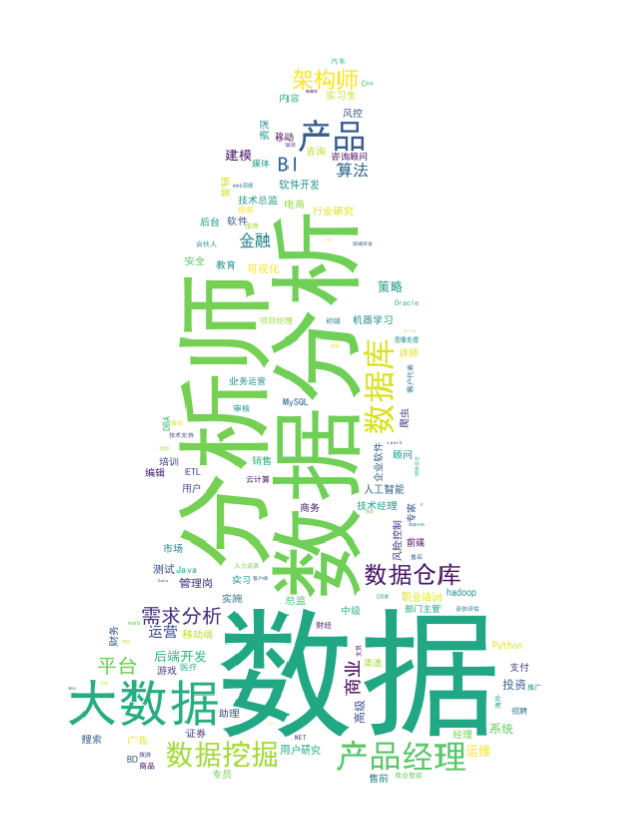

In [101]:
from PIL import Image
piccc = np.array(Image.open(r"y.png"))
df_word_counts=df_word.unstack().dropna().reset_index().groupby('level_0').count()

from wordcloud import WordCloud
df_word_counts.index=df_word_counts.index.str.replace("'","")

wc=WordCloud(font_path=r'simhei.ttf',width=900,height=400,background_color='white',mask=piccc)
fig,ax=plt.subplots(figsize=(20,15))
wc.fit_words(df_word_counts.level_1)
ax=plt.imshow(wc)
plt.axis('off')
plt.show()

In [102]:
df_clean.head()

,city,companyShortName,companySize,education,positionLables,workYear,avgSalary,positionName
0,上海,1号店,2000人以上,硕士,"['分析师', '数据分析', '数据挖掘', '数据']",应届毕业生,8.0,数据分析师
1,上海,点融网,500-2000人,本科,"['分析师', '数据分析', '数据挖掘', '数据']",应届毕业生,12.5,数据分析师-CR2017-SH2909
2,上海,SPD,50-150人,本科,"['分析师', '数据分析', '数据']",应届毕业生,5.0,数据分析师
3,上海,数云,150-500人,本科,"['商业', '分析师', '大数据', '数据']",应届毕业生,7.0,大数据业务分析师【数云校招】
4,上海,银基富力,15-50人,本科,"['分析师', '数据分析', '数据', 'BI']",应届毕业生,2.5,BI开发/数据分析师


In [105]:
df_clean.to_json('joooob.json')